<a href="https://colab.research.google.com/github/Praagnya/IPL-Analysis-2008-2019/blob/main/IPL_Analysis_2008_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/Praagnya/IPL-Analysis-2008-2019/main/matches.csv'
matches = pd.read_csv(url)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
url1 = 'https://raw.githubusercontent.com/Praagnya/IPL-Analysis-2008-2019/main/deliveries.csv'
deliveries = pd.read_csv(url1)
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [4]:
print(matches.shape)
print(deliveries.shape)

(756, 18)
(179078, 21)


In [5]:
matches.isnull().sum() #checking for null values is matches dataset

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
#dropping the umpire 3 column as we won't use it in the analysis
matches_drop_cols = ['umpire3']
matches = matches.drop(matches_drop_cols, axis=1)

## Number of matches in each season:

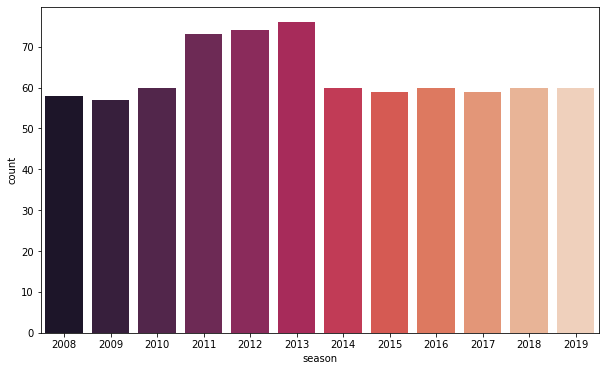

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='season', data=matches, palette="rocket")
plt.show()

There is a spike in the middle three years where the number of matches are more than 70 as there were 10 teams in the following years.

# Number of matches in each venue:

In [8]:
#renaming the venues 
matches.at[matches['venue']=='M. Chinnaswamy Stadium','venue']='M Chinnaswamy Stadium'
matches.at[matches['venue']=='M. A. Chidambaram Stadium','venue']='MA Chidambaram Stadium, Chepauk'
matches.at[matches['venue']=='Feroz Shah Kotla Ground','venue']='Feroz Shah Kotla'
matches.at[matches['venue']=='Punjab Cricket Association IS Bindra Stadium, Mohali','venue']='Punjab Cricket Association Stadium, Mohali'

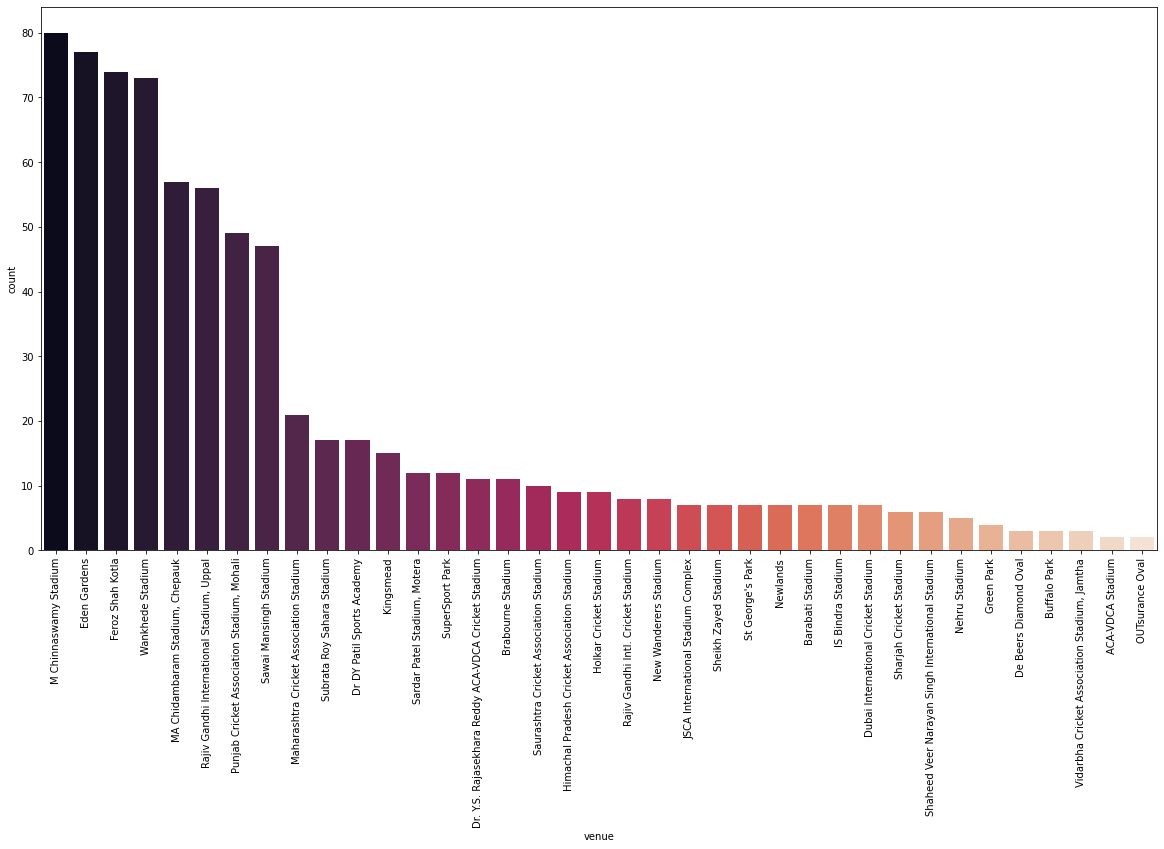

In [9]:
plt.figure(figsize = (20,10))
sns.countplot(x='venue', data=matches, order=matches['venue'].value_counts().index, palette='rocket')
plt.xticks(rotation='vertical')
plt.show()

# Total win by each team

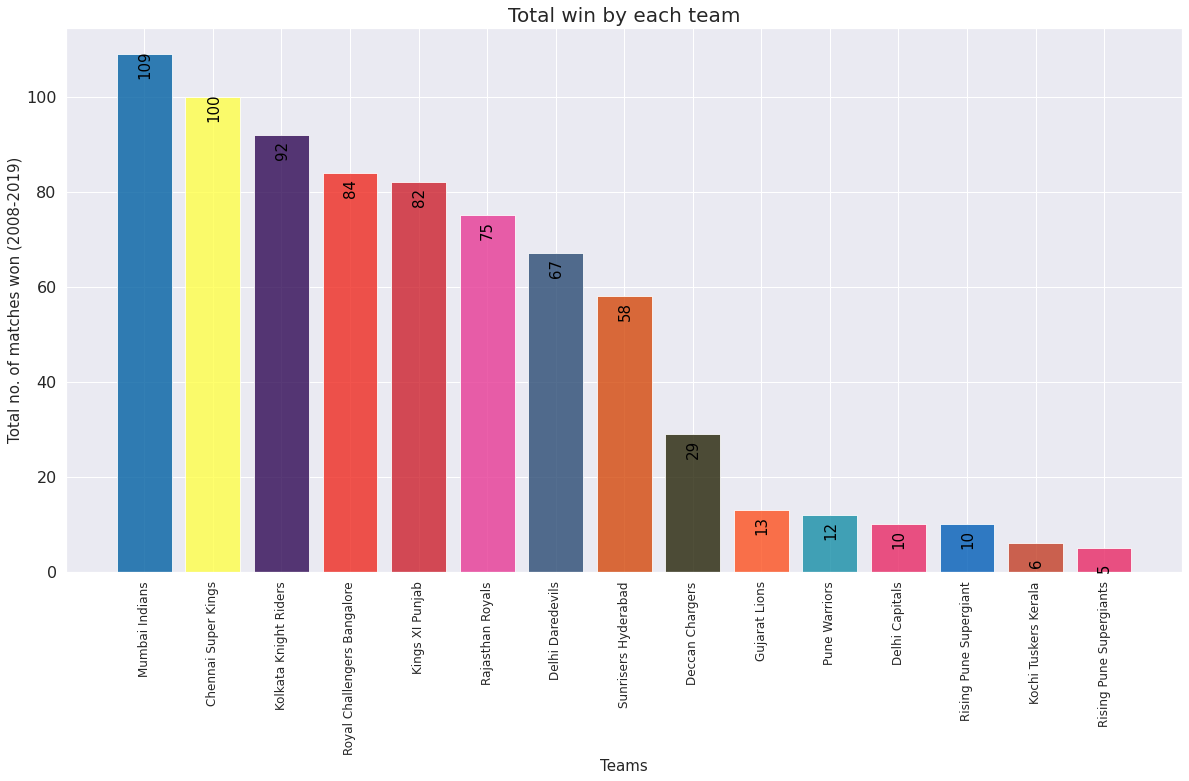

In [10]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(20,10)
wins=pd.DataFrame(matches['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#005fa2','#FFFF48','#2e0854','#EF2920','#CD202D','#e73895',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.1,i-4.6,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total win by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won (2008-2019)',fontsize=15)
plt.show()


# Top 20 players with most MOM awards

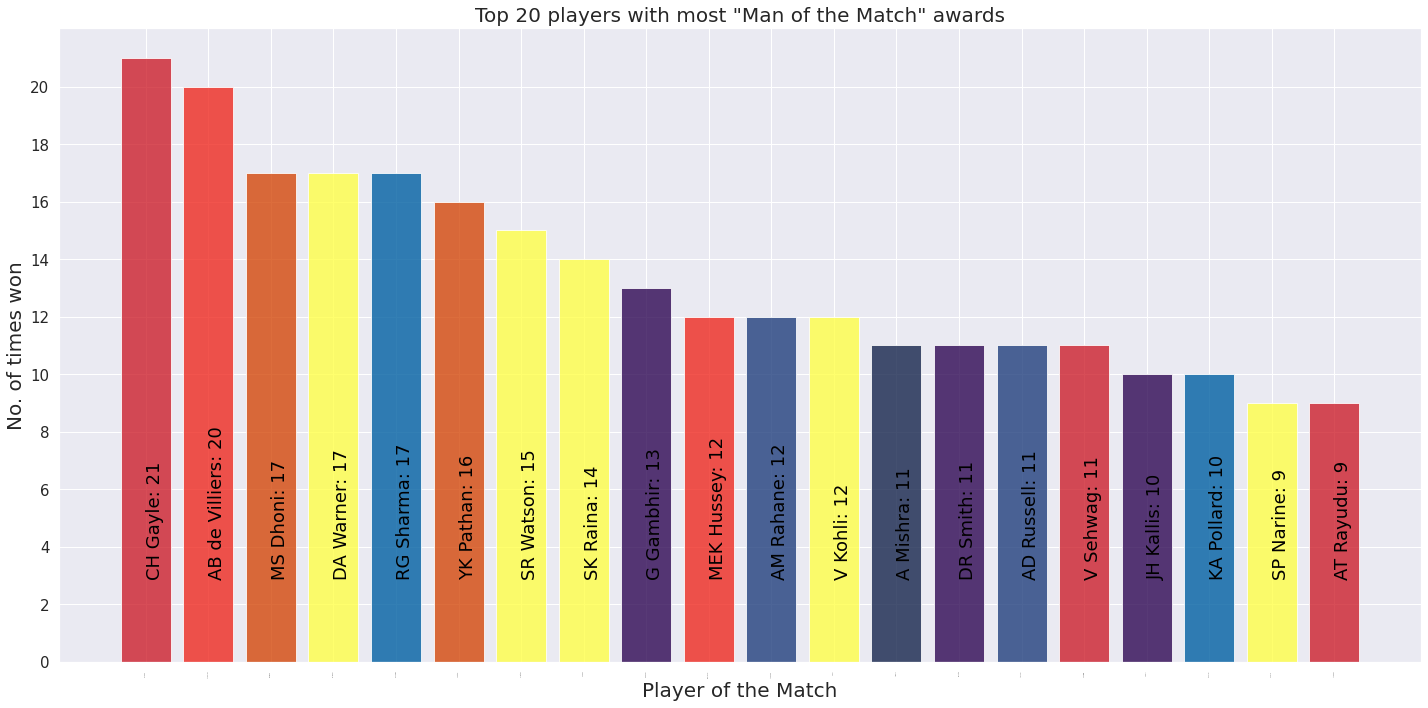

In [11]:
players = pd.DataFrame(matches['player_of_match'].value_counts())
players['name'] = players.index
players = players.head(20)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(rotation=90, fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'],players['player_of_match'],
        color =['#CD202D','#EF2920','#D4480B','#FFFF48','#005fa2',
               '#D4480B','#FFFF48','#FFFF48','#2e0854','#EF2920','#213f7d',
               '#FFFF48','#15244C','#2e0854','#213f7d','#CD202D','#2e0854',
               '#005fa2','#FFFF48','#CD202D'],alpha=0.8)
count = 0
for i in players['player_of_match']:
    plt.text(count,3,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the Match" awards', fontsize=20)
plt.xlabel('Player of the Match',size = 20)
plt.ylabel('No. of times won',size = 20)
plt.tight_layout()
plt.show()

# Batsmen aggregates (Runs, Balls, 4s, 6s, SR)

In [12]:
batsman_grp = deliveries.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()

# Ignore the wide balls.
balls_faced = deliveries[deliveries["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

fours = deliveries[ deliveries["batsman_runs"] == 4]
sixes = deliveries[ deliveries["batsman_runs"] == 6]

fours_per_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

fours_per_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns = ["match_id", "inning", "batsman", "6s"]

batsmen = batsmen.merge(fours_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

for col in ["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col] = batsmen[col].fillna(0)

dismissals = deliveries[ pd.notnull(deliveries["player_dismissed"])]
dismissals = dismissals[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]
dismissals.rename(columns={"player_dismissed": "batsman"}, inplace=True)
batsmen = batsmen.merge(dismissals, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

batsmen = matches[['id','season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsmen.head(2)

,season,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,0.0,2.0,266.67,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0,175.00,caught,Mandeep Singh


# Bowler Aggregates

In [13]:
bowler_grp = deliveries.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])
bowlers = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()

bowlers["runs"] = bowlers["total_runs"] - (bowlers["bye_runs"] + bowlers["legbye_runs"])
bowlers["extras"] = bowlers["wide_runs"] + bowlers["noball_runs"]

del( bowlers["bye_runs"])
del( bowlers["legbye_runs"])
del( bowlers["total_runs"])

dismissal_kinds_for_bowler = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
dismissals = deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds_for_bowler)]
dismissals = dismissals.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])["dismissal_kind"].count().reset_index()
dismissals.rename(columns={"dismissal_kind": "wickets"}, inplace=True)

bowlers = bowlers.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"], 
                        right_on=["match_id", "inning", "bowling_team", "bowler", "over"], how="left")
bowlers["wickets"] = bowlers["wickets"].fillna(0)

bowlers_over = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler'])['over'].count().reset_index()
bowlers = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler']).sum().reset_index().drop('over', 1)
bowlers = bowlers_over.merge(bowlers, on=["match_id", "inning", "bowling_team", "bowler"], how = 'left')
bowlers['Econ'] = np.round(bowlers['runs'] / bowlers['over'] , 2)
bowlers = matches[['id','season']].merge(bowlers, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

bowlers.head(2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,season,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,runs,extras,wickets,Econ
0,2017,1,1,Royal Challengers Bangalore,A Choudhary,4,3,1,55,4,1.0,13.75
1,2017,1,1,Royal Challengers Bangalore,S Aravind,3,0,0,36,0,0.0,12.00


# Percentage of total runs scored through boundaries for each batsman

In [14]:
batsman_runs = batsmen.groupby(['batsman'])['batsman_runs', '4s', '6s'].sum().reset_index()
batsman_runs['4s_6s'] = batsman_runs['4s'] * 4 + batsman_runs['6s'] * 6
batsman_runs['pct_boundaries'] = np.round(batsman_runs['4s_6s'] / batsman_runs['batsman_runs'] * 100, 2)
batsman_runs = batsman_runs.sort_values(by = 'batsman_runs', ascending = False)
top_batsman_runs = batsman_runs[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


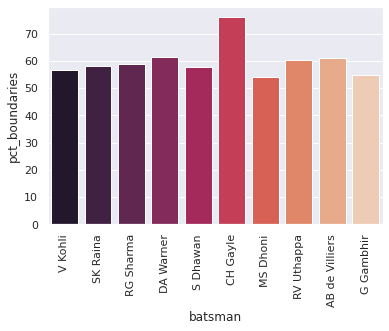

In [15]:
sns.barplot(x='batsman',y='pct_boundaries',data=top_batsman_runs,palette='rocket');
plt.xticks(rotation='vertical');

The top batsmen hit around 55-60% of their runs through boundaries, however Christoper Henry Gayle is an exception with 76%. He definitely is the 'Universe Boss'.

# Performance of top bowlers over seasons

In [16]:
bowlers_wickets = bowlers.groupby(['bowler'])['wickets'].sum()
bowlers_wickets.sort_values(ascending = False, inplace = True)
bowlers_wickets = bowlers_wickets[:10]
bowlers_wickets = bowlers_wickets.reset_index()
top_bowlers_wickets = bowlers_wickets[:10]

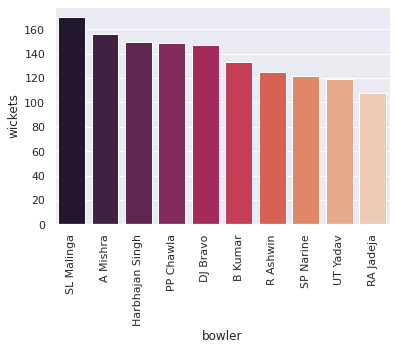

In [17]:
sns.barplot(x='bowler',y='wickets',data=top_bowlers_wickets, palette='rocket');
plt.xticks(rotation='vertical');

Malinga is the highest wicket taken in the IPL so far.

# Most extras by teams 

In [18]:
bowlers_extras = bowlers.groupby(['bowling_team'])['extras'].sum()
bowlers_extras.sort_values(ascending = False, inplace = True)
bowlers_extras = bowlers_extras.reset_index()
most_bowlers_extras = bowlers_extras[:10]

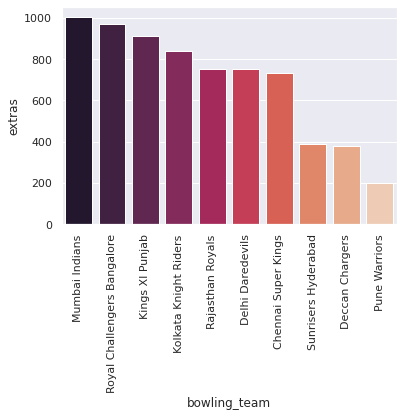

In [19]:
sns.barplot(x='bowling_team',y='extras',data=most_bowlers_extras,palette='rocket');
plt.xticks(rotation='vertical');

Mumbai Indians have given away maximum number of runs through extras. This is quite surprising as they are also 4 times title winners(most by any team).

# Royal Challengers Bangalore: Team Analysis 

---



In [ ]:
RCB_matches = matches.loc[(matches['team1'] == 'Royal Challengers Bangalore')|(matches['team2'] == 'Royal Challengers Bangalore')]
RCB_matches_1 = RCB_matches.loc[RCB_matches['team1'] != 'Royal Challengers Bangalore']
RCB_matches_1['Opponent'] = RCB_matches_1['team1']
RCB_matches_2 = RCB_matches.loc[RCB_matches['team2'] != 'Royal Challengers Bangalore']
RCB_matches_2['Opponent'] = RCB_matches_2['team2']
RCB_matches_final0 = [RCB_matches_1,RCB_matches_2]
RCB_matches_final =  pd.concat(RCB_matches_final0)

In [21]:
RCB_matches_final['is_winner'] = np.where(RCB_matches_final['Opponent'] == RCB_matches_final['winner'], 'no','yes')
RCB_matches_final = RCB_matches_final.dropna(subset=['winner'])

In [22]:
RCB_matches_final.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Opponent,is_winner
715,11311,2019,Bengaluru,07/04/19,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,4,K Rabada,M Chinnaswamy Stadium,S Ravi,Yeshwant Barde,Delhi Capitals,no
726,11322,2019,Mumbai,15/04/19,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SL Malinga,Wankhede Stadium,Marais Erasmus,Nitin Menon,Mumbai Indians,no
730,11326,2019,Kolkata,19/04/19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Royal Challengers Bangalore,10,0,V Kohli,Eden Gardens,Ian Gould,Nitin Menon,Kolkata Knight Riders,yes
734,11330,2019,Bengaluru,21/04/19,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,1,0,PA Patel,M Chinnaswamy Stadium,Vineet Kulkarni,Rod Tucker,Chennai Super Kings,yes
737,11333,2019,Bengaluru,24/04/19,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,17,0,AB de Villiers,M Chinnaswamy Stadium,Bruce Oxenford,C Shamshuddin,Kings XI Punjab,yes


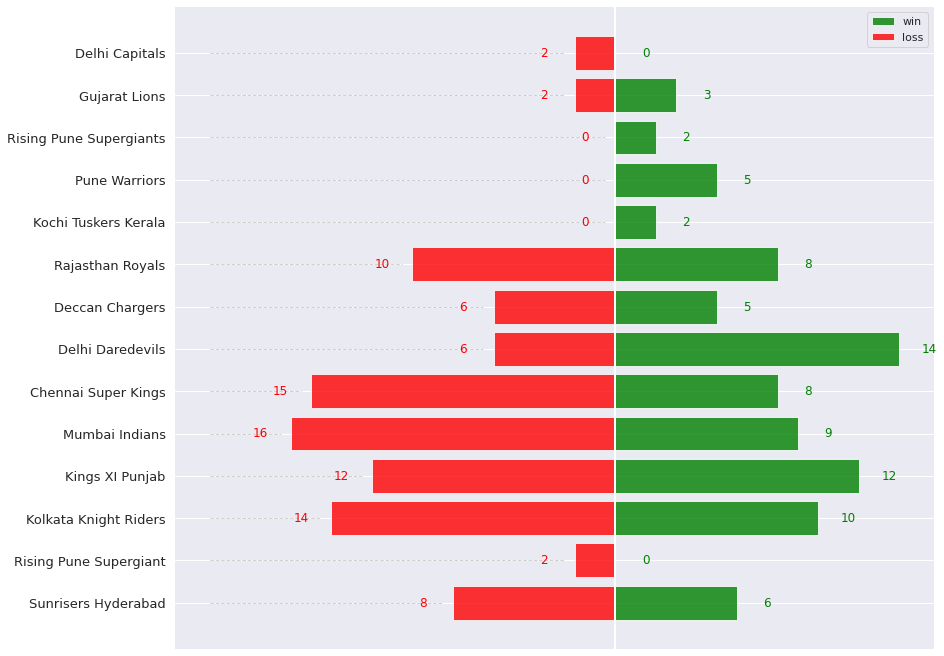

In [23]:
fig = plt.figure(constrained_layout=True, figsize=[13, 9])
ax = fig.add_subplot()

opponents = RCB_matches_final['Opponent'].unique()
wins, loses = list(),list()
for opponent in opponents:
    mapped = RCB_matches_final[RCB_matches_final['Opponent'] == opponent]['is_winner'].map({"yes":1,"no":0})
    wins.append(mapped.sum())
    loses.append(len(mapped)-mapped.sum())

ax.barh(y=opponents, width=wins, color="green", alpha=0.8, label="win")
ax.barh(y=opponents, width=[-x for x in loses], color="red", alpha=0.8, label="loss")
ax.hlines(y=opponents, xmin=-20, xmax=[-x-0.5 for x in loses], linestyles='--', linewidth=1, alpha=0.2)

for i in range(len(opponents)):
    ax.text(y=opponents[i], x=wins[i]+1.5, s=wins[i], fontsize=12, color="green", horizontalalignment="center", verticalalignment="center")
    ax.text(y=opponents[i], x=0-(loses[i]+1.5), s=loses[i], fontsize=12, color="red", horizontalalignment="center", verticalalignment="center")

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_position(("data", 0))
ax.spines["right"].set_linewidth(2)
ax.set_xticks([])
ax.set_yticklabels(opponents, fontsize=13)

plt.legend()
plt.show()

# WORK IN PROGRESS...